In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 

In [25]:
def get_data_from_db(db_file_path, query):
    """Пример запроса к созданной базе данных"""
    conn = sqlite3.connect(db_file_path)
    
    df_result = pd.read_sql_query(query, conn)
    
    conn.close()

    return df_result

In [26]:
df = pd.read_excel("../datasets/data_weather_prepoc.xlsx", index_col=[0])
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120385 entries, 0 to 120384
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   center                     120385 non-null  object        
 1   uav_type                   119942 non-null  object        
 2   flight_id                  113739 non-null  float64       
 3   duration_min               117786 non-null  float64       
 4   takeoff_lat                118322 non-null  float64       
 5   takeoff_lon                118322 non-null  float64       
 6   landing_lat                118313 non-null  float64       
 7   landing_lon                118313 non-null  float64       
 8   wind_dir                   120385 non-null  float64       
 9   wind_speed                 120385 non-null  float64       
 10  Т(С)                       117807 non-null  float64       
 11  f(%)                       117807 non-null  float64      

None

,center,uav_type,flight_id,duration_min,takeoff_lat,takeoff_lon,landing_lat,landing_lon,wind_dir,wind_speed,...,dep_date,dep_time,arr_date,arr_time,season,air_traffic_load,traffic_cnt,relative_air_traffic_load,distance,speed
0,Тюмень,BLA,7.771444e+09,960.0,60.400000,69.816667,60.400000,69.816667,315.0,2.166667,...,2024-01-01,00:00:00,2024-01-01,16:00:00,winter,0.027036,39586,1.0,0.0,0.0
1,Тюмень,BLA,7.771445e+09,960.0,61.100000,72.766667,61.100000,72.766667,315.0,2.166667,...,2024-01-01,00:00:00,2024-01-01,16:00:00,winter,0.027036,39586,1.0,0.0,0.0
2,Тюмень,BLA,7.771445e+09,960.0,60.950000,73.000000,60.950000,73.000000,315.0,2.166667,...,2024-01-01,00:00:00,2024-01-01,16:00:00,winter,0.027036,39586,1.0,0.0,0.0
3,Тюмень,BLA,7.771445e+09,960.0,61.033333,73.866667,61.033333,73.866667,315.0,2.166667,...,2024-01-01,00:00:00,2024-01-01,16:00:00,winter,0.027036,39586,1.0,0.0,0.0
4,Тюмень,BLA,7.771445e+09,960.0,60.816667,72.816667,60.816667,72.816667,315.0,2.166667,...,2024-01-01,00:00:00,2024-01-01,16:00:00,winter,0.027036,39586,1.0,0.0,0.0


График: Средняя пройденная дистанция дронами по месяцам.

In [27]:
graph_1_data = df[df["distance"] > 0][["dep_date", "distance"]]
graph_1_data.head()

# Данных маловато...

,dep_date,distance
13,2024-01-01,34149.429378
14,2024-01-01,15436.558754
23,2024-01-01,2070.430584
72,2024-01-02,10123.418981
73,2024-01-02,2070.430584


График:  Средняя скорость дронов по месяцам.

In [28]:
graph_2_data = df[df["speed"] > 0][["dep_date", "speed"]]
graph_2_data.head()

# Данных маловато...

,dep_date,speed
13,2024-01-01,28.940194
14,2024-01-01,13.081829
23,2024-01-01,2.875598
72,2024-01-02,17.917556
73,2024-01-02,2.875598


График: Глобальное распределение длительности полётов.

C:\Users\yurak\AppData\Local\Temp\ipykernel_20020\410609053.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


<Figure size 600x600 with 0 Axes>

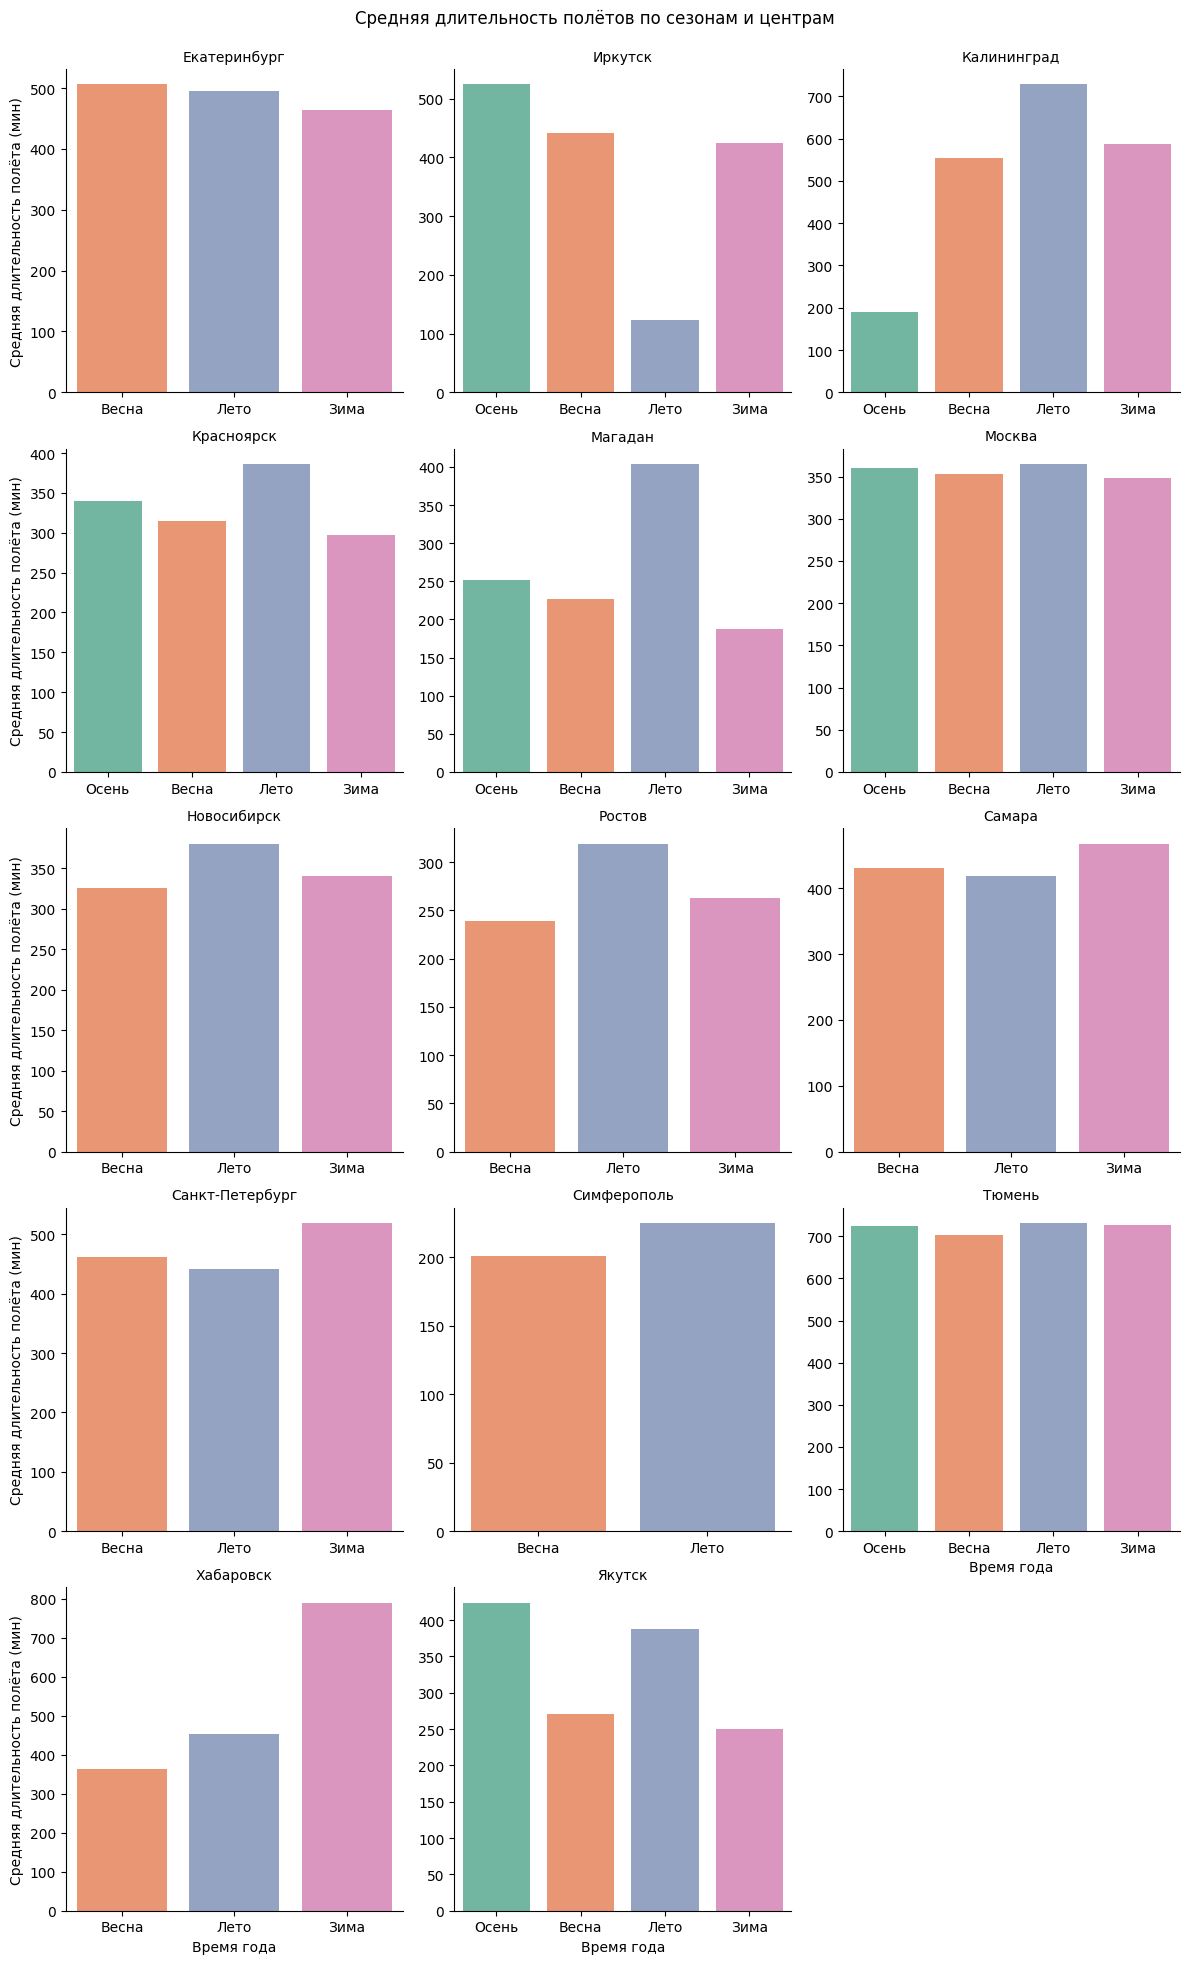

In [29]:
# Размер графика
plt.figure(figsize=(6, 6))

# Подготовка данных
global_duration_df = df.groupby(["center", "season"])["duration_min"].mean().reset_index(name="mean_duration")

global_duration_df["season"] = global_duration_df["season"].map(
    {
        "autumn": "Осень",
        "spring": "Весна",
        "summer": "Лето",
        "winter": "Зима"
    }
)

# График
g = sns.catplot(
    data=global_duration_df,
    x="season", y="mean_duration",
    col="center",              
    kind="bar",
    col_wrap=3,
    height=4, aspect=1,
    sharex=False,
    sharey=False,
    palette="Set2"
)

g.set_titles("{col_name}")  
g.set_axis_labels("Время года", "Средняя длительность полёта (мин)")

plt.subplots_adjust(top=0.95)
plt.suptitle("Средняя длительность полётов по сезонам и центрам")
plt.show()

График: Локальный график длительности полётов по месяцам.

C:\Users\yurak\AppData\Local\Temp\ipykernel_20020\4009734878.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=duration_by_month, x="arr_date", y="duration_min", palette="flare")


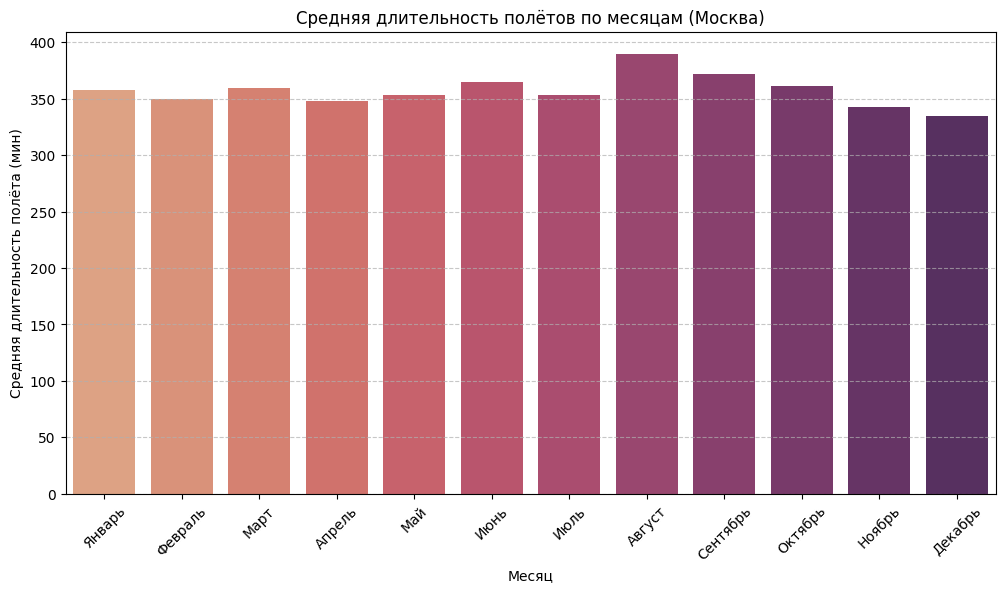

In [30]:
# Тестовый ввод
CENTER_NAME = "Москва"

# Подготовка данных
CENTER_NAME_df = df[df["center"] == CENTER_NAME]

duration_by_month = (
    CENTER_NAME_df.groupby(df["arr_date"].dt.month)["duration_min"]
    .mean()
    .reset_index()
)

duration_by_month["arr_date"] = duration_by_month["arr_date"].map(
    {
        1: "Январь",
        2: "Февраль",
        3: "Март",
        4: "Апрель",
        5: "Май",
        6: "Июнь",
        7: "Июль",
        8: "Август",
        9: "Сентябрь",
        10: "Октябрь",
        11: "Ноябрь",
        12: "Декабрь"
    }
) 

# График
plt.figure(figsize=(12, 6))
sns.barplot(data=duration_by_month, x="arr_date", y="duration_min", palette="flare")
plt.title(f"Средняя длительность полётов по месяцам ({CENTER_NAME})")
plt.xlabel("Месяц")
plt.ylabel("Средняя длительность полёта (мин)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

График: Сезонная загруженность.

C:\Users\yurak\AppData\Local\Temp\ipykernel_20020\3419405953.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


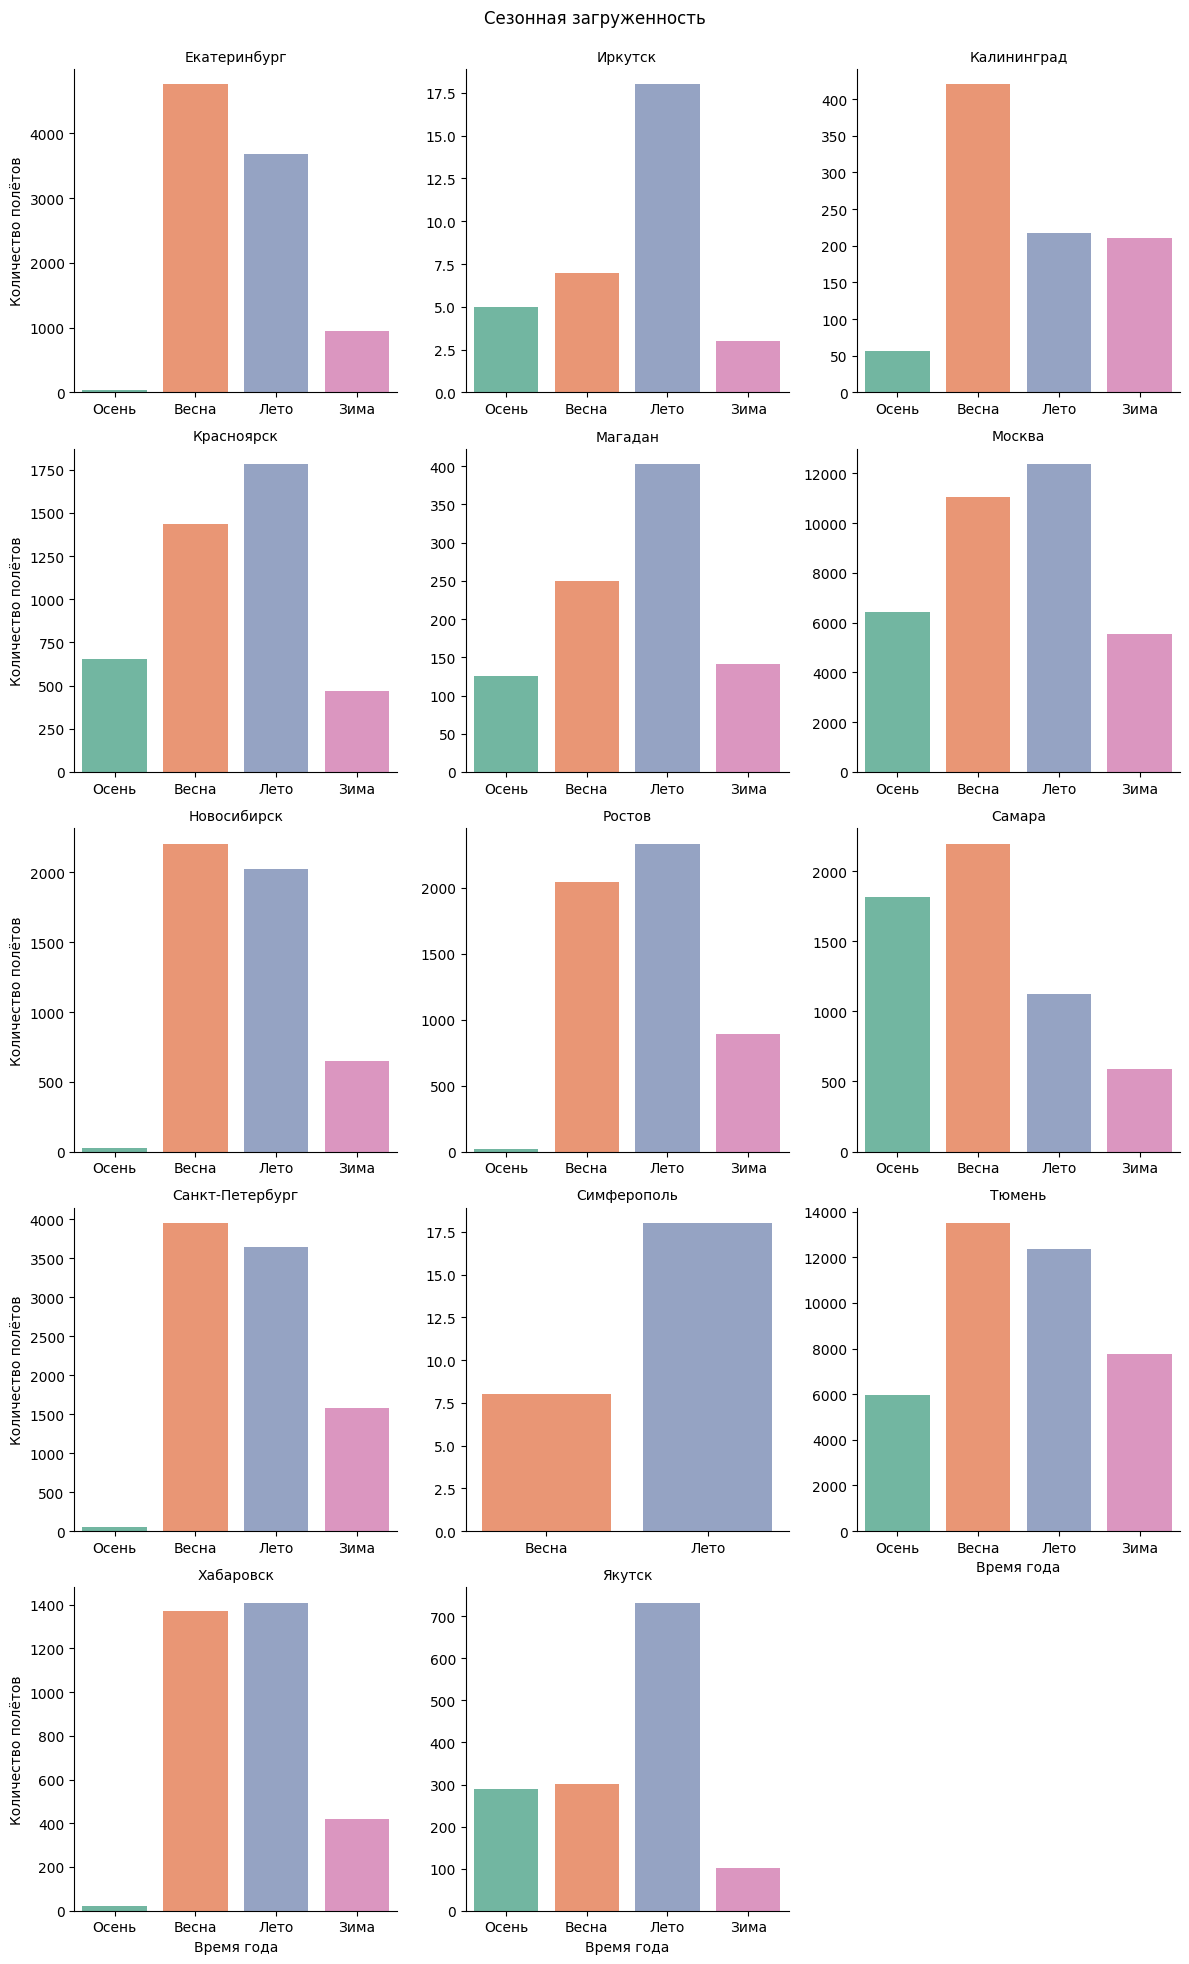

In [31]:
# Подготовка данных
seasonal_load_df = df.groupby(["center", "season"])["traffic_cnt"].count().reset_index()

seasonal_load_df["season"] = seasonal_load_df["season"].map(
    {
        "autumn": "Осень",
        "spring": "Весна",
        "summer": "Лето",
        "winter": "Зима"
    }
)

# График
g = sns.catplot(
    data=seasonal_load_df,
    x="season", y="traffic_cnt",
    col="center",              
    kind="bar",
    col_wrap=3,
    height=4, aspect=1,
    sharex=False,
    sharey=False,
    palette="Set2"
)

g.set_titles("{col_name}")  
g.set_axis_labels("Время года", "Количество полётов")

plt.subplots_adjust(top=0.95)
plt.suptitle("Сезонная загруженность")

plt.show()


График: Локальный график загруженности по месяцам. (Новый)

In [38]:
get_data_from_db(
    "../datasets/uav_flights.db",
    f'''
    SELECT *
    FROM flights
    '''
)

,flight_id,center_id,uav_type_id,season_id,region_id,dep_datetime,arr_datetime,duration_min,takeoff_lat,takeoff_lon,landing_lat,landing_lon,distance,speed
0,7771444069.0,1,1.0,1,1,2024-01-01 00:00:00 00:00:00,2024-01-01 00:00:00 16:00:00,960.0,60.400000,69.816667,60.400000,69.816667,0.000000,0.000000
1,7771445411.0,1,1.0,1,1,2024-01-01 00:00:00 00:00:00,2024-01-01 00:00:00 16:00:00,960.0,61.100000,72.766667,61.100000,72.766667,0.000000,0.000000
2,7771445409.0,1,1.0,1,1,2024-01-01 00:00:00 00:00:00,2024-01-01 00:00:00 16:00:00,960.0,60.950000,73.000000,60.950000,73.000000,0.000000,0.000000
3,7771445408.0,1,1.0,1,1,2024-01-01 00:00:00 00:00:00,2024-01-01 00:00:00 16:00:00,960.0,61.033333,73.866667,61.033333,73.866667,0.000000,0.000000
4,7771445403.0,1,1.0,1,1,2024-01-01 00:00:00 00:00:00,2024-01-01 00:00:00 16:00:00,960.0,60.816667,72.816667,60.816667,72.816667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120154,7772799254.0,13,1.0,3,13,2025-07-31 00:00:00 23:20:00,2025-08-01 00:00:00 04:54:00,334.0,48.566667,135.083333,48.566667,135.083333,0.000000,0.000000
120155,7772799263.0,13,1.0,3,13,2025-07-31 00:00:00 23:20:00,2025-08-01 00:00:00 00:22:00,62.0,48.500000,135.083333,48.500000,135.083333,0.000000,0.000000
120156,7772812459.0,10,8.0,3,10,2025-07-31 00:00:00 23:30:00,2025-08-01 00:00:00 01:34:00,124.0,56.700000,61.300000,56.466667,61.516667,29141.209879,235.009757
120157,7772812018.0,10,8.0,3,10,2025-07-31 00:00:00 23:30:00,2025-08-01 00:00:00 01:30:00,120.0,56.566667,61.383333,56.666667,61.500000,13213.454618,110.112122


In [ ]:
get_data_from_db(
    "../datasets/uav_flights.db",
    f'''
    SELECT 
        f.center_id, 
        f.flight_id,
        f.duration_min,
        wc.flight_id,
        wc.temperature_c,
        wc.wind_speed
    FROM flights f INNER JOIN weather_conditions wc ON f.flight_id = wc.flight_id
    WHERE center_id IN (
        SELECT center_id
        FROM centers
        WHERE center_name == '{CENTER_NAME}'
    ) 
    '''
)

C:\Users\yurak\AppData\Local\Temp\ipykernel_20020\3865512882.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_local_load_df, x="arr_date", y="center", palette="flare")


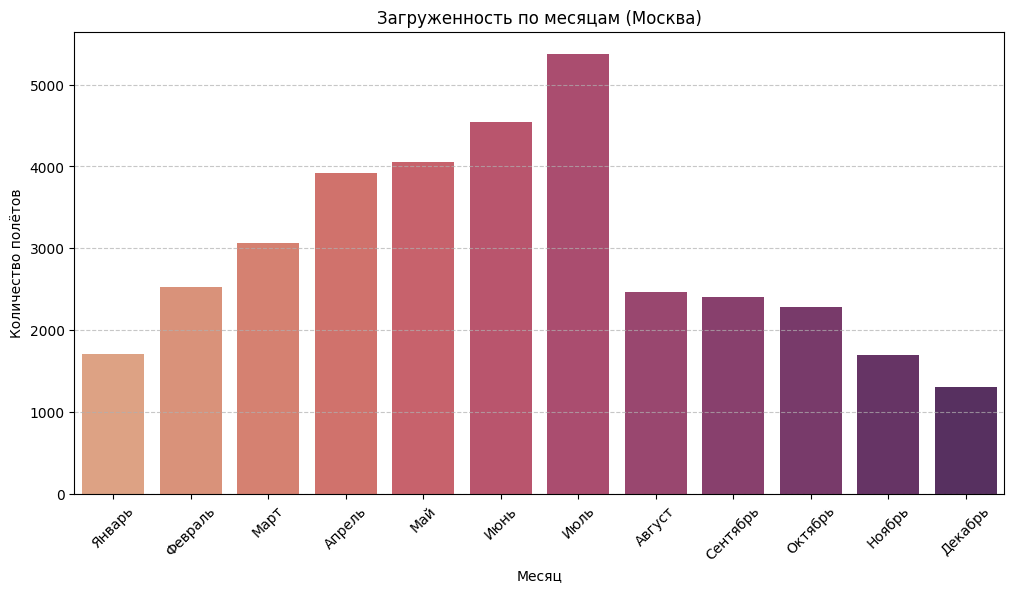

In [32]:
# Тестовый ввод
CENTER_NAME = "Москва"

# Подготовка данных
CENTER_NAME_df = df[df["center"] == CENTER_NAME]

monthly_local_load_df = (
    CENTER_NAME_df.groupby(df["arr_date"].dt.month)["center"]
    .count()
    .reset_index()
)

# График
monthly_local_load_df["arr_date"] = monthly_local_load_df["arr_date"].map(
    {
        1: "Январь",
        2: "Февраль",
        3: "Март",
        4: "Апрель",
        5: "Май",
        6: "Июнь",
        7: "Июль",
        8: "Август",
        9: "Сентябрь",
        10: "Октябрь",
        11: "Ноябрь",
        12: "Декабрь"
    }
) 

# График
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_local_load_df, x="arr_date", y="center", palette="flare")
plt.title(f"Загруженность по месяцам ({CENTER_NAME})")
plt.xlabel("Месяц")
plt.ylabel("Количество полётов")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

График: Зависимость длительности полёта от температуры и скорости ветра.

In [33]:
get_data_from_db(
    "../datasets/uav_flights.db",
    f'''
    SELECT 
        f.center_id, 
        f.flight_id,
        f.duration_min,
        wc.flight_id,
        wc.temperature_c,
        wc.wind_speed
    FROM flights f INNER JOIN weather_conditions wc ON f.flight_id = wc.flight_id
    WHERE center_id IN (
        SELECT center_id
        FROM centers
        WHERE center_name == '{CENTER_NAME}'
    ) 
    '''
)

,center_id,flight_id,duration_min,flight_id,temperature_c,wind_speed
0,2,7771445428.0,375.0,7771445428.0,-12.466667,1.666667
1,2,7771446286.0,454.0,7771446286.0,-19.350000,1.500000
2,2,7771442462.0,115.0,7771442462.0,-19.350000,1.500000
3,2,7771446891.0,667.0,7771446891.0,-24.180000,2.000000
4,2,7771446897.0,667.0,7771446897.0,-24.180000,2.000000
...,...,...,...,...,...,...
30165,2,7772812605.0,88.0,7772812605.0,27.600000,0.000000
30166,2,7772812607.0,88.0,7772812607.0,27.600000,0.000000
30167,2,7772810912.0,87.0,7772810912.0,27.600000,0.000000
30168,2,7772813060.0,70.0,7772813060.0,27.600000,0.000000


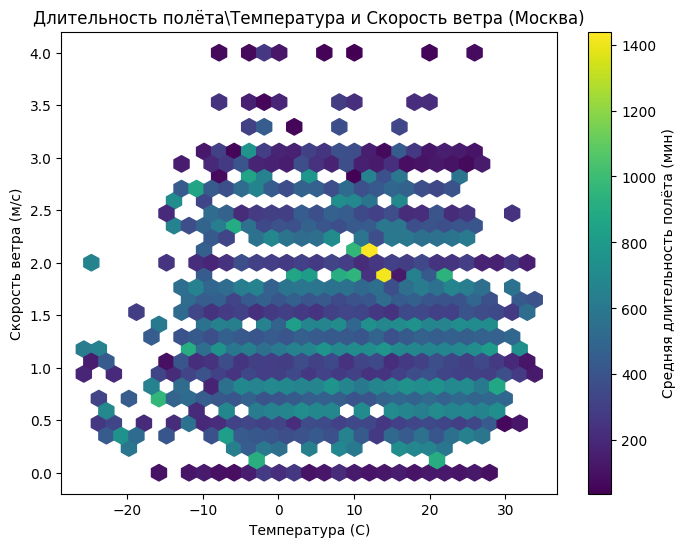

In [34]:
# Тестовый ввод
CENTER_NAME = "Москва"

# Подготовка данных
CENTER_NAME_df = get_data_from_db(
    "../datasets/uav_flights.db",
    f'''
    SELECT 
        f.center_id, 
        f.flight_id,
        f.duration_min,
        wc.flight_id,
        wc.temperature_c,
        wc.wind_speed
    FROM flights f INNER JOIN weather_conditions wc ON f.flight_id = wc.flight_id
    WHERE center_id IN (
        SELECT center_id
        FROM centers
        WHERE center_name == '{CENTER_NAME}'
    ) 
    '''
) # df[df["center"] == CENTER_NAME]

# График
plt.figure(figsize=(8,6))
plt.hexbin(
    CENTER_NAME_df["temperature_c"], 
    CENTER_NAME_df["wind_speed"], 
    C=CENTER_NAME_df["duration_min"],   # средняя длительность
    gridsize=30, cmap="viridis", 
    reduce_C_function=np.mean
)
plt.colorbar(label="Средняя длительность полёта (мин)")
plt.xlabel("Температура (C)")
plt.ylabel("Скорость ветра (м/с)")
plt.title(f"Длительность полёта\Температура и Скорость ветра ({CENTER_NAME})")
plt.show()



График: Интенсивность полётов по часам и дням недели.

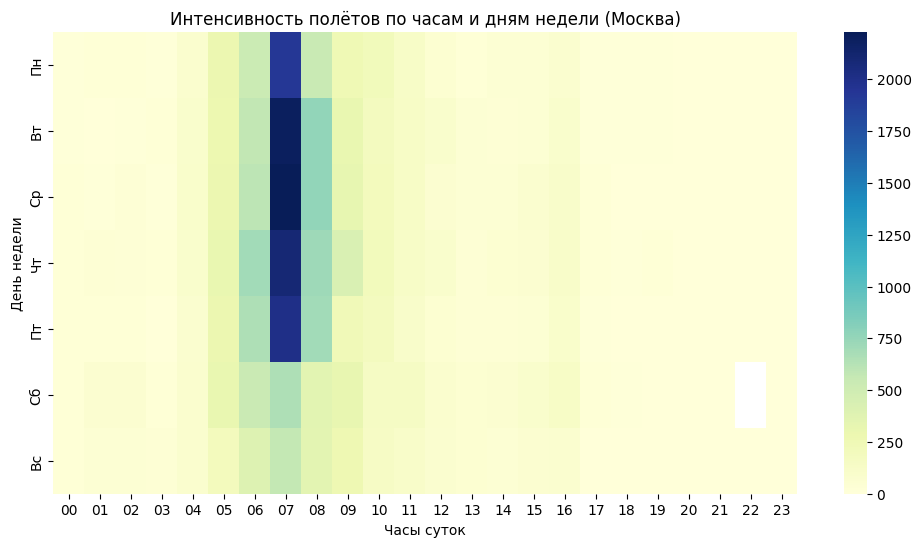

In [35]:
# Тестовый ввод
CENTER_NAME = "Москва"

# Подготовка данных
CENTER_NAME_df = df[df["center"] == CENTER_NAME].copy()

CENTER_NAME_df["hour"] = CENTER_NAME_df["dep_time"].apply(lambda x: x.split(":")[0])
CENTER_NAME_df["weekday"] = CENTER_NAME_df["dep_date"].dt.dayofweek

heatmap_data = (
    CENTER_NAME_df.groupby(["weekday", "hour"])["flight_id"]
    .count()
    .reset_index()
    .pivot(index="weekday", columns="hour", values="flight_id")
)

days_map = {
    0: "Пн", 1: "Вт", 2: "Ср", 3: "Чт",
    4: "Пт", 5: "Сб", 6: "Вс"
}
heatmap_data.index = heatmap_data.index.map(days_map)

# График
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    cmap="YlGnBu"
)

plt.title(f"Интенсивность полётов по часам и дням недели ({CENTER_NAME})")
plt.xlabel("Часы суток")
plt.ylabel("День недели")
plt.show()


График: Средняя продолжительность полёта для каждого типа дронов.

In [36]:
get_data_from_db(
    "../datasets/uav_flights.db",
    '''
        SELECT 
            u.uav_type_name,
            AVG(f.duration_min) AS avg_duration
        FROM flights f
        JOIN uav_types u ON f.uav_type_id = u.uav_type_id
        GROUP BY u.uav_type_name
        ORDER BY avg_duration DESC;
    '''
)

,uav_type_name,avg_duration
0,BLA,515.628841
1,SHAR,334.805970
2,ORLAN,288.000000
3,DJI,261.000000
4,BWS,244.000000
5,AER,170.986328
6,FANTOM,57.000000


C:\Users\yurak\AppData\Local\Temp\ipykernel_20020\1951523132.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


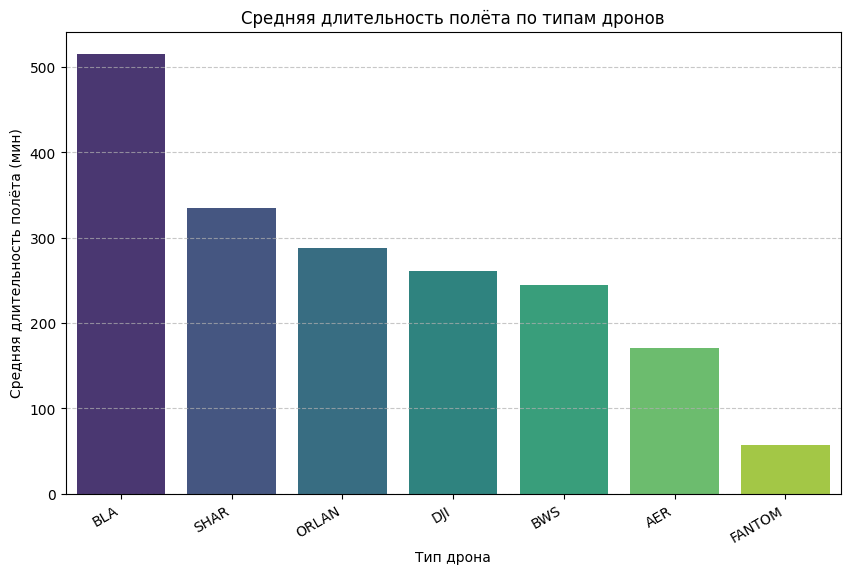

In [37]:
# Подготовка данных
uav_duration_min = get_data_from_db(
    "../datasets/uav_flights.db",
    '''
        SELECT 
            u.uav_type_name,
            AVG(f.duration_min) AS avg_duration
        FROM flights f
        JOIN uav_types u ON f.uav_type_id = u.uav_type_id
        GROUP BY u.uav_type_name
        ORDER BY avg_duration DESC;
    '''
) #df.groupby("uav_type")["duration_min"].mean()

# График
plt.figure(figsize=(10,6))
sns.barplot(
    x=uav_duration_min["uav_type_name"], 
    y=uav_duration_min["avg_duration"],
    palette="viridis"
)
plt.title("Средняя длительность полёта по типам дронов")
plt.xlabel("Тип дрона")
plt.ylabel("Средняя длительность полёта (мин)")
plt.xticks(rotation=30, ha="right")  # если названия длинные
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()